In [1]:
!pip uninstall -y tensorflow
!pip uninstall -y tensorflow-gpu
!pip install -q tensorflow-gpu==2.0.0-beta1

Uninstalling tensorflow-gpu-2.0.0b1:
  Successfully uninstalled tensorflow-gpu-2.0.0b1


In [2]:
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

2.0.0-beta1


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0 , x_test/255.0
print("x_Train.shape = %s",x_train.shape)

x_Train.shape = %s (60000, 28, 28)


In [8]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print("x_Train.shape = %s",x_train.shape)
K = len(set(y_train))
print("No of CATEGORIES = %s",K)

x_Train.shape = %s (60000, 28, 28, 1)
No of CATEGORIES = %s 10


In [9]:
i= Input(shape=x_train[0].shape)
x= Conv2D(32, (3, 3), strides=2,activation='relu')(i)
x= Conv2D(64, (3, 3), strides=2,activation='relu')(x)
x= Conv2D(128, (3, 3), strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i,x)


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 31s 509us/sample - loss: 0.4394 - accuracy: 0.8364 - val_loss: 0.4063 - val_accuracy: 0.8465
Epoch 2/15
60000/60000 [==============================] - 30s 503us/sample - loss: 0.3449 - accuracy: 0.8684 - val_loss: 0.3404 - val_accuracy: 0.8708
Epoch 3/15
60000/60000 [==============================] - 30s 503us/sample - loss: 0.3028 - accuracy: 0.8843 - val_loss: 0.3129 - val_accuracy: 0.8846
Epoch 4/15
60000/60000 [==============================] - 31s 511us/sample - loss: 0.2701 - accuracy: 0.8978 - val_loss: 0.3090 - val_accuracy: 0.8889
Epoch 5/15
60000/60000 [==============================] - 32s 532us/sample - loss: 0.2481 - accuracy: 0.9050 - val_loss: 0.2997 - val_accuracy: 0.8876
Epoch 6/15
60000/60000 [==============================] - 32s 530us/sample - loss: 0.2263 - accuracy: 0.9143 - val_loss: 0.3177 - val_accuracy: 0.8897
Epoch 7/15
60000/60000 [====================

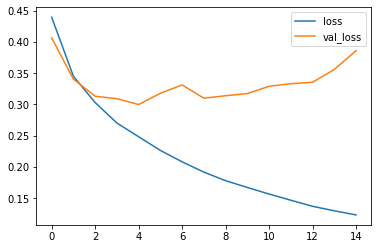

In [13]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()


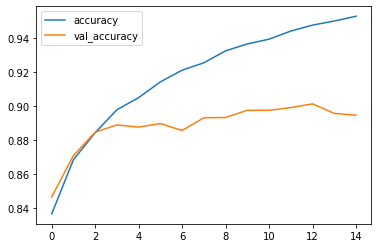

In [15]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

Not Normalized confusion matrix
[[868   2  29  26   4   0  64   0   7   0]
 [  2 975   1  15   4   0   3   0   0   0]
 [ 14   1 883  11  44   0  46   0   1   0]
 [ 12   8  17 919  26   0  17   0   1   0]
 [  1   0  76  32 841   0  49   0   1   0]
 [  0   0   0   3   0 950   0  37   0  10]
 [156   2  71  28 121   0 616   0   6   0]
 [  0   0   0   0   0   6   0 953   0  41]
 [  5   0   5   4   6   1   3   2 974   0]
 [  1   0   0   0   0   4   0  28   0 967]]


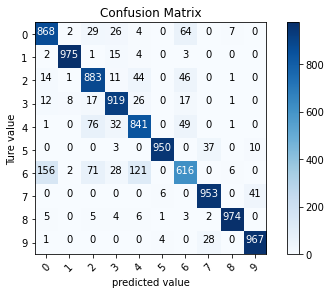

In [18]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes, normalize= False,title='Confusion Matrix', cmap = plt.cm.Blues): 
  if normalize:
    cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Not Normalized confusion matrix')
  print(cm)
  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks =np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation='45')
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text( j, i, format(cm[i,j], fmt),
             horizontalalignment="center",
            color = "white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('Ture value')
  plt.xlabel('predicted value')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [21]:
labels='''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot'''.split()

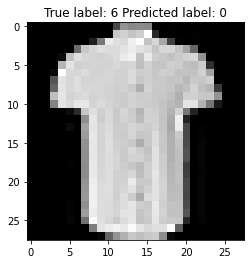

In [25]:
misclassfied_idx = np.where( p_test != y_test)[0]
i= np.random.choice(misclassfied_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted label: %s" % (y_test[i], p_test[i])) ; 